In [1]:
import os
import cv2

In [17]:
features=[]
target=[]
for i in ["angry","disgusted","fearful","happy","neutral","sad","surprised"]:
    ImagesNamesList=os.listdir("C:/Users/hp/OneDrive/Desktop/EmotionDetectionTrainingDatasets" + "/" + str(i))
    for j in ImagesNamesList:
        Imagarr=cv2.imread("C:/Users/hp/OneDrive/Desktop/EmotionDetectionTrainingDatasets" + "/" + str(i) +"/" + j)
        try:
            imagarr=cv2.resize(Imagarr,(32,32))
        except:
                pass
        else:
                features.append(Imagarr)
                if i=="angry":
                    target.append(0)
                elif i=="disgust":
                    target.append(1)
                elif i=="fear":
                    target.append(2)
                elif i=="happy":
                    target.append(3)
                elif i=="neutral":
                    target.append(4)
                elif i=="sad":
                    target.append(5)
                elif i=="surprise":
                    target.append(6)
                print("In folder, i" )            

In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i
In folder, i

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn

In [6]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [30]:
picture_size = 50
folder_path = "C:/Users/hp/OneDrive/Desktop/EmotionDetectionTrainingDatasets/"


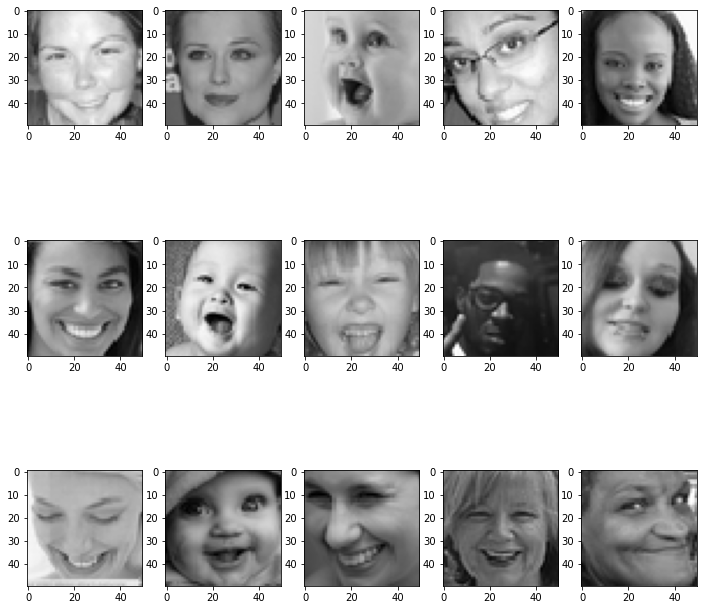

In [31]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 16, 1):
    plt.subplot(3,5,i)
    img = load_img(folder_path+ expression+"/"+
                  os.listdir(folder_path +  expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [33]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("C:/Users/hp/OneDrive/Desktop/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [34]:
from keras.optimizers import Adam,SGD,RMSprop
no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [35]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [36]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
224/224 [==============================] - 1940s 9s/step - loss: 1.7173 - accuracy: 0.3481 - val_loss: 1.7527 - val_accuracy: 0.3747
Epoch 2/48
224/224 [==============================] - 797s 4s/step - loss: 1.3828 - accuracy: 0.4703 - val_loss: 1.3392 - val_accuracy: 0.4907
Epoch 3/48
224/224 [==============================] - 798s 4s/step - loss: 1.2291 - accuracy: 0.5313 - val_loss: 1.1883 - val_accuracy: 0.5428
Epoch 4/48
224/224 [==============================] - 808s 4s/step - loss: 1.1426 - accuracy: 0.5691 - val_loss: 1.1562 - val_accuracy: 0.5573
Epoch 5/48
224/224 [==============================] - 1756s 8s/step - loss: 1.0699 - accuracy: 0.5949 - val_loss: 1.1738 - val_accuracy: 0.5550
Epoch 6/48
224/224 [==============================] - 2142s 10s/step - loss: 1.0050 - accuracy: 0.6182 - val_loss: 1.2044 - val_accuracy: 0.5431
Epoch 7/48
224/224 [==============================] - ETA: 0s 

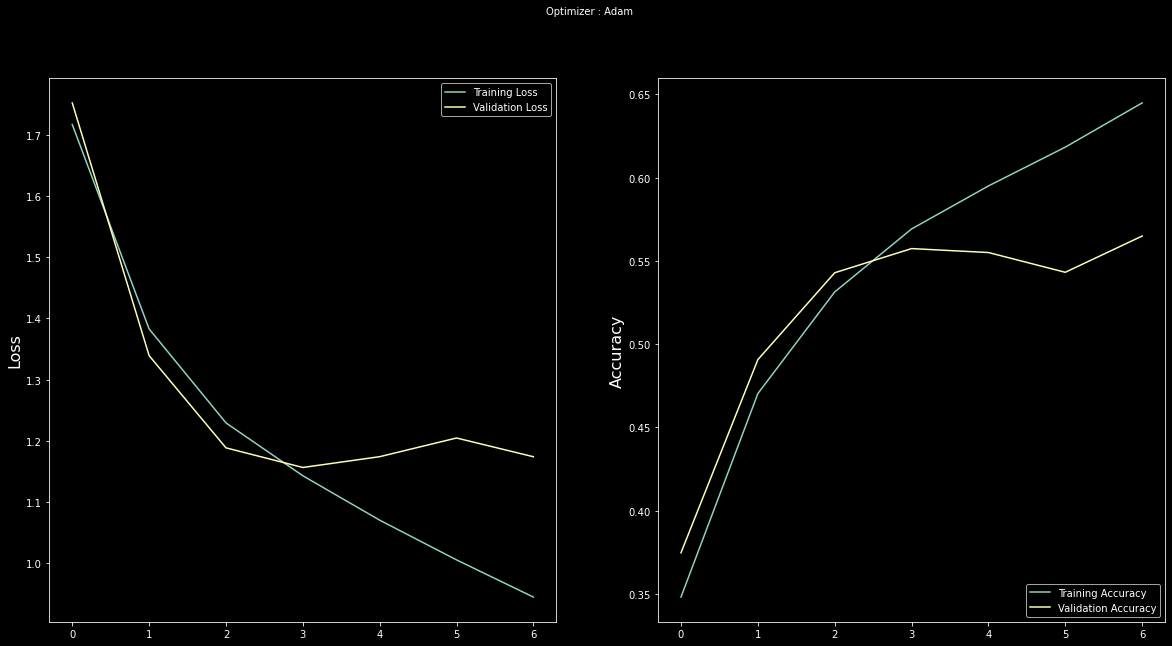

In [37]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'C:\Datasets\haarcascade_frontalface_default.xml')
classifier =load_model(r'C:\Datasets\model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()